# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

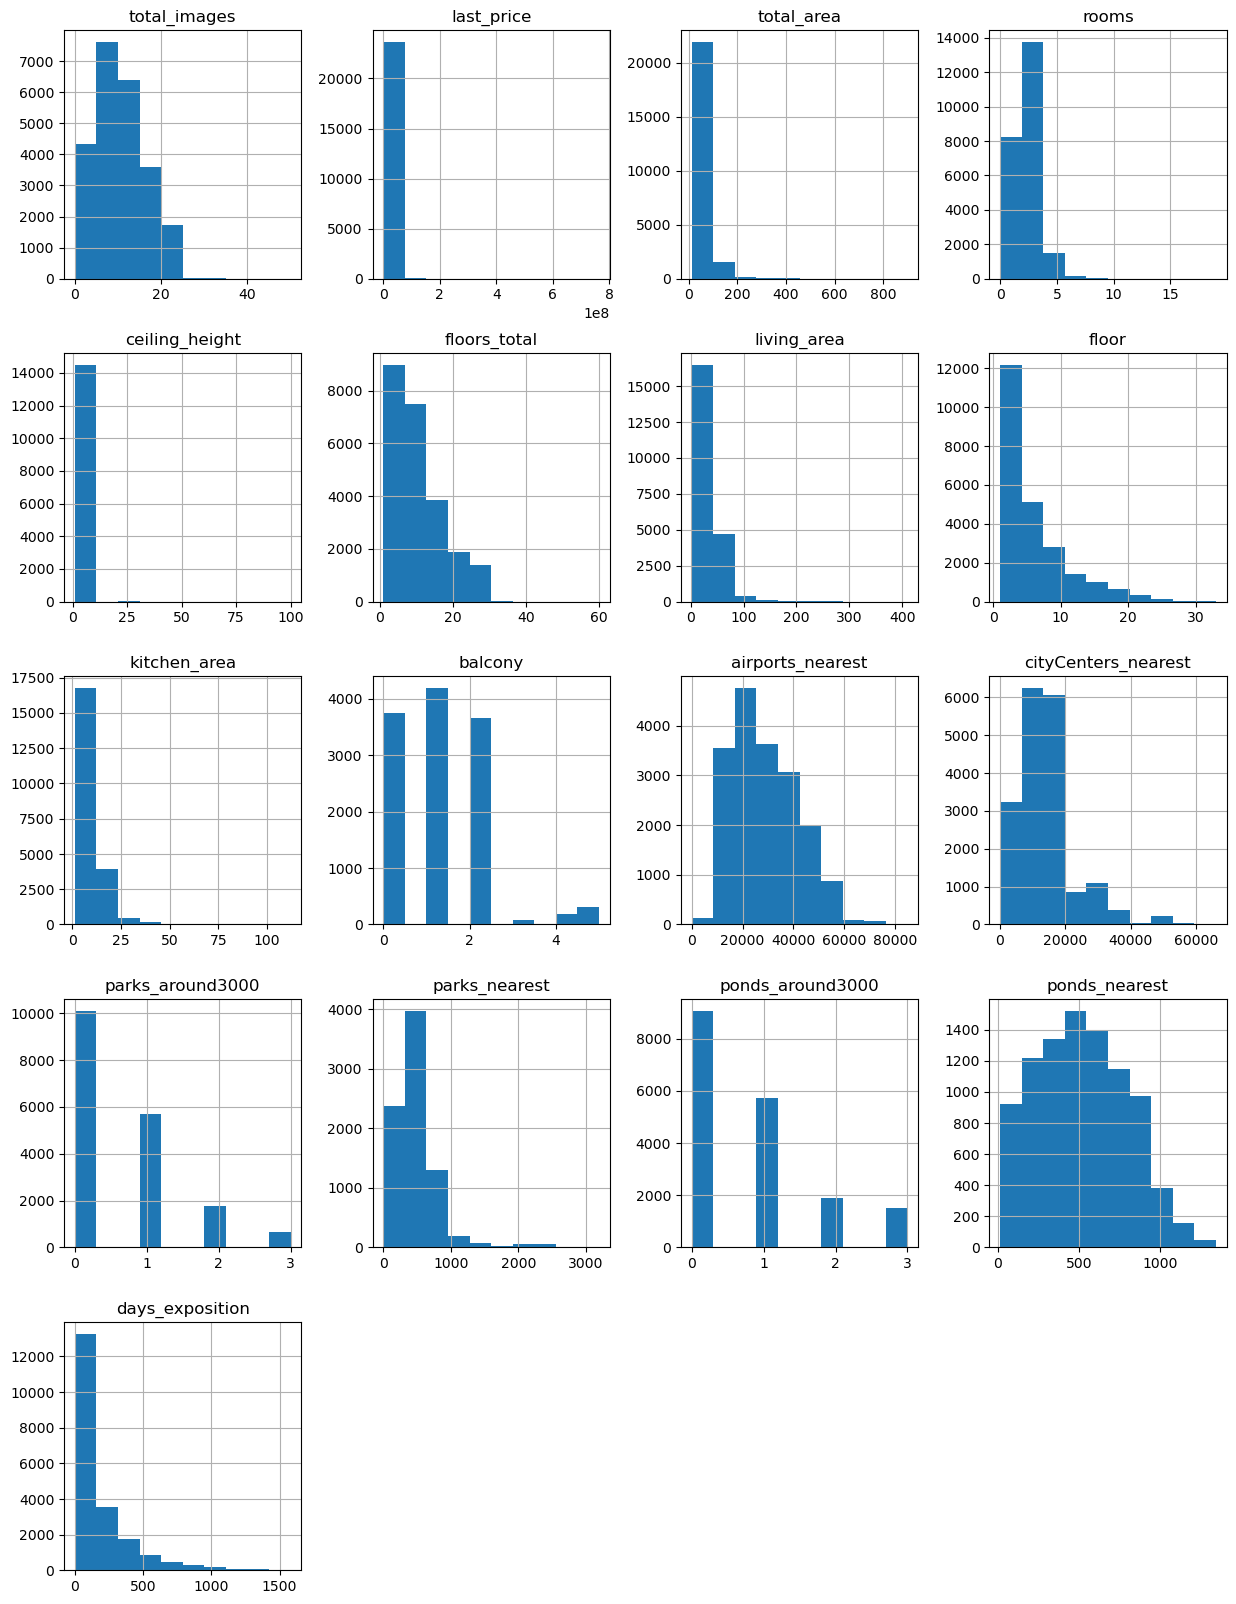

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.hist(figsize=(15,20))
plt.show()

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В ходе первоначального осмотра данных я ознакомился с частью таблицы, в которой весьма много пропусков.<br>
Взору сразу же попались пропущенные значения в столбцах: ceiling_height, is_apartment, balcon.<br>
Они и будут первой целью предобработки данных.

### Предобработка данных

In [4]:
#В столбце 'ceiling_height' большое кол-во пропусков значений, заменим пропуски на медиану высот потолка всех квартир. 
data[data['ceiling_height'].isna()].head()
data['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
len(data[data['ceiling_height'].isna()])

0

In [5]:
#В столбце 'balcony' заменили пропуски на ноль, это обозначает, что в квартире нет балкона.
data['balcony'] = data['balcony'].fillna(0)
len(data[data['balcony'].isna()])

0

In [6]:
#В столбце 'kitchen_area' заменили пропуски на ноль, вероятнее всего кухни там нет
data[data['kitchen_area'].isna()]
data['kitchen_area'] = data['kitchen_area'].fillna(0)
len(data[data['kitchen_area'].isna()])

0

In [7]:
#В столбце 'is_apartment' заменили пропуски на False.
#Пропущенное значение, скорее всего, обозначает именно то, что квартира не является апартаментами
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data[data['is_apartment'] == True])
data[data['is_apartment'].isna()]

       total_images  last_price  total_area first_day_exposition  rooms  \
543              11  12790000.0       56.60  2018-11-06T00:00:00      2   
916              11   8183000.0       70.00  2018-01-11T00:00:00      2   
1109              1  34878556.0       95.80  2014-12-09T00:00:00      2   
1608             12   2150000.0       20.10  2019-01-30T00:00:00      1   
2759             11   7500000.0      152.00  2018-07-27T00:00:00      3   
2975              9   4931398.0       42.90  2018-07-23T00:00:00      1   
3067             13   6600000.0       95.00  2018-09-08T00:00:00      2   
3816              4   4779000.0       53.10  2016-05-16T00:00:00      1   
3951             10   4300000.0       50.00  2019-04-20T00:00:00      1   
4339             19   6900000.0       72.00  2019-03-25T00:00:00      3   
5076              0   3850000.0       30.50  2018-10-03T00:00:00      1   
5297             19  45000000.0       96.00  2018-11-15T00:00:00      2   
5654             20   920

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [8]:
#Удалили строки с пропусками в столбце 'locality_name'
data['locality_name'].dropna(inplace=True)


In [9]:
#Удалили строки с пропусками в столбце 'floors_total'
data['floors_total'].dropna(inplace=True)

In [10]:
#Заменили тип данных столбца 'first_day_exposition' на корректный
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [11]:
#Убрали типы населенных пунктов
data['locality_name'].unique()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('городской поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('станции ', '')
data['locality_name'] = data['locality_name'].str.lstrip()
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [12]:
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,9.553814,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,6.420973,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,6.300000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [13]:
#Удалили строки с квартирами выше 100кк, их мало,  такие квартиры помешают исследованию, это элитная недвижимость или ошибочный ценник.
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

Квартир стоимостью 0: 0
Квартир стоимостью больше 100.000.000: 37


In [14]:
#Вновь удалили элитную недвижимость с метражом квартир более 500м^2 и кол-вом комнат больше 8
print('Квартир c площадью менее 5 кв.м.:',data.query('total_area < 5')['total_area'].count()) 
print('Квартир c площадью более 500 кв.м.:',data.query('total_area > 500')['total_area'].count())
data.drop(index=data.query('total_area > 500').index,inplace=True)
print('Квартир с кол-вом комнат более 8:',data.query('rooms > 8')['rooms'].count())
data.drop(index=data.query('rooms > 8').index,inplace=True)

Квартир c площадью менее 5 кв.м.: 0
Квартир c площадью более 500 кв.м.: 3
Квартир с кол-вом комнат более 8: 17


In [15]:
#По СНиП минимальная высота потолков 2,1, удалим строки с значениями в 'ceiling_height' ниже этого значения
print('Квартир c высотой потолка ниже 2,1м:',data.query('ceiling_height < 2.1')['total_area'].count())
data.drop(index=data.query('ceiling_height < 2.1').index,inplace=True)

Квартир c высотой потолка ниже 2,1м: 14


In [16]:
#Удалили квартиры с высотой потолка больше 4м (или элитная недвижимость или ошибка, оба варианта мешают качественному анализу, а значения с 21м по 32м переписали в корректные, разделив на 10.
print('Квартир с высотой потолка больше 4м:', data.query('ceiling_height > 4')['ceiling_height'].count())
print('Квартир с высотой потолка выше 32м и более:', data.query('ceiling_height > 32')['ceiling_height'].count())
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 21').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 21) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)
data.drop(index=data.query('ceiling_height > 32').index,inplace=True)

Квартир с высотой потолка больше 4м: 70
Квартир с высотой потолка выше 32м и более: 1


In [17]:
#Самое многоэтажное здание в Питере имеет кол-во этажей 36, удалим строки с значениями в 'floors_total' > 36
print('Кол-во квартир в 36+ этажных домах: ', data.query('floors_total > 36')['floors_total'].count())
data.drop(index=data.query('floors_total > 36').index,inplace=True)

Кол-во квартир в 36+ этажных домах:  2


In [18]:
#Удалим квартиры с жил.площадью меньше 10 кв.м. и больше 200 кв.м
print('Жилая площадь меньше 10 кв.м.:', data.query('living_area < 10')['living_area'].count())
data.drop(index=data.query('living_area < 10').index, inplace=True)
print('Жилая площадь большее 200 кв.м. :', data.query('living_area > 200')['living_area'].count())
data.drop(index=data.query('living_area > 200').index, inplace=True)

Жилая площадь меньше 10 кв.м.: 25
Жилая площадь большее 200 кв.м. : 12


In [19]:
data.reset_index(drop=True, inplace=True)

Для произведения качественного анализа данных всегда мешают аномальные значения, которыми является элитная недвижимость, цена на нее может в десятки и более раз отличаться от средней на рынке. В данном случае, за элитную недвижимость я принял недвижимость с высотой потолка более 4м, а также недвижимость с площадью более 200 кв.м. Также были удалена недвижимость с площадью менее 10кв.м., которая показалась ошибкой при занесении данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [20]:
#Создаем столбец с ценой одного квадратного метра
data['price_for_sqm'] = data['last_price'] / data['total_area']

In [21]:
#Создаем столбец с днем публикации объявления
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [22]:
#Также создаем столбцы с месяцем и годом создания объявления
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [23]:
#Пишем свою функцию для категоризации этажа, создаем столбец с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)
def floor_group_int(row):
    if row['floor'] == 1:
        return 1
    elif row['floor'] == row['floors_total']:
        return 0
    else:
        return 2
data['floor_type_int'] = data.apply(floor_group_int, axis=1)

In [24]:
#Создаем столбец расстояния до центра в км
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

### Проведите исследовательский анализ данных

In [25]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sqm,day_of_week,month,year,floor_type_int,cityCenters_nearest_km
count,23540.000000,2.354000e+04,23540.000000,23540.000000,23540.000000,23454.000000,21651.000000,23540.000000,23540.000000,23540.000000,...,7980.000000,18038.000000,9015.000000,20386.000000,23540.000000,23540.000000,23540.000000,23540.000000,23540.000000,18037.000000
mean,9.846686,6.178264e+06,59.440667,2.055777,2.692367,10.688241,33.940655,5.894775,9.475176,0.592056,...,491.317293,0.765939,518.844592,180.328657,98405.655299,2.569286,6.401232,2017.368352,1.597154,14.234629
std,5.678111,6.133477e+06,31.090743,1.029819,0.201823,6.584554,19.478119,4.887225,6.174873,0.959512,...,342.975895,0.935101,277.624509,219.169178,42631.435269,1.788940,3.491302,1.039331,0.721185,8.607999
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,10.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,6.300000,0.000000,...,288.000000,0.000000,295.000000,45.000000,76523.211306,1.000000,3.000000,2017.000000,1.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,8.955000,0.000000,...,455.000000,0.000000,503.000000,95.000000,94878.048780,3.000000,6.000000,2017.000000,2.000000,13.000000
75%,14.000000,6.727650e+06,69.300000,3.000000,2.700000,16.000000,42.100000,8.000000,11.400000,1.000000,...,612.250000,1.000000,731.000000,231.000000,113960.113960,4.000000,10.000000,2018.000000,2.000000,16.000000
max,50.000000,9.900000e+07,494.100000,8.000000,4.000000,36.000000,200.000000,33.000000,107.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,848484.848485,6.000000,12.000000,2019.000000,2.000000,66.000000


Изучаем каждый параметр объекта посредством создания гистограммы

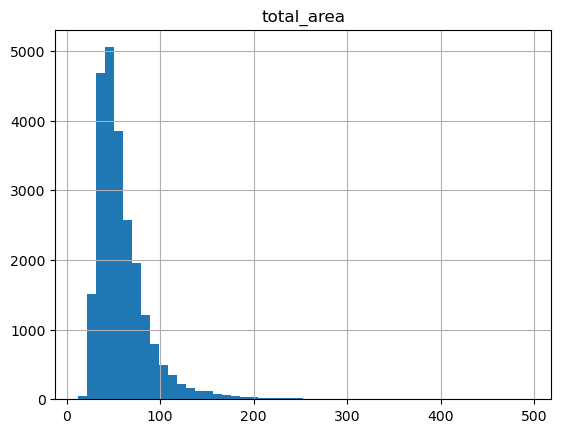

In [26]:
#общая площадь
data.hist('total_area', bins=50)
plt.show()

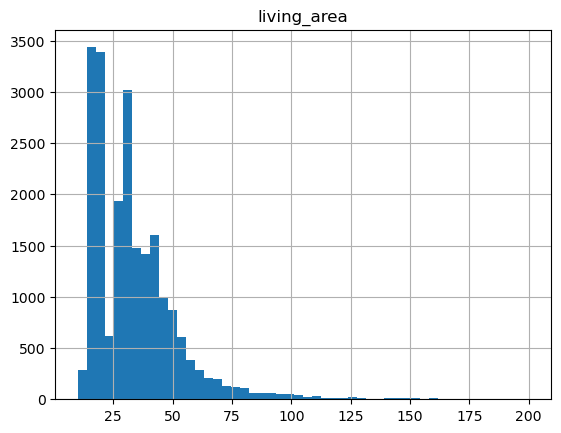

In [27]:
#жилая площадь
data.hist('living_area', bins=50)
plt.show()

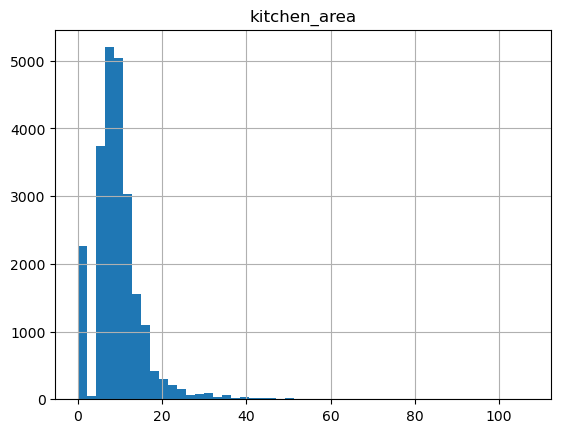

In [28]:
#площадь кухни
data.hist('kitchen_area', bins=50)
plt.show()

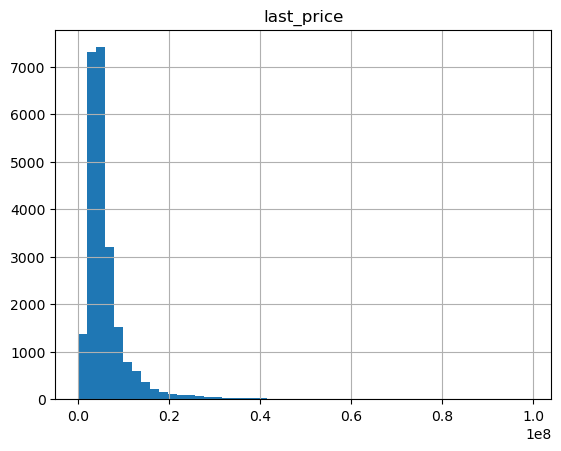

In [29]:
#цена объекта
data.hist('last_price', bins=50)
plt.show()

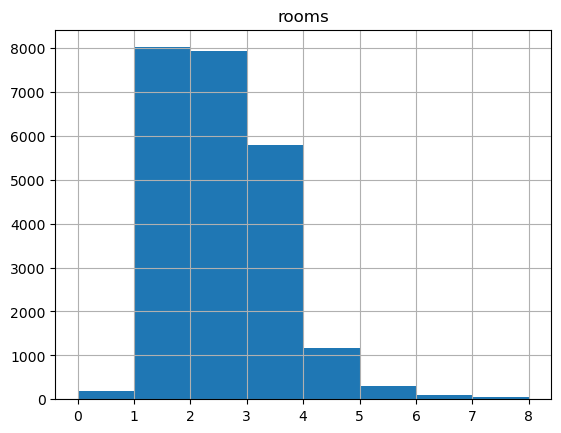

In [30]:
#количество комнат
data.hist('rooms', bins=8)
plt.show()

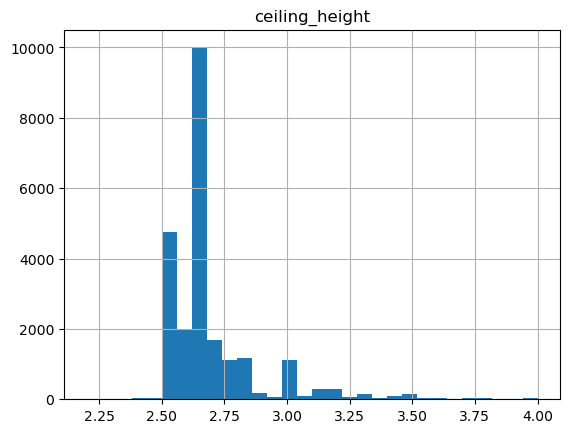

In [31]:
#высота потолков
data.hist('ceiling_height',bins=30)
plt.show()

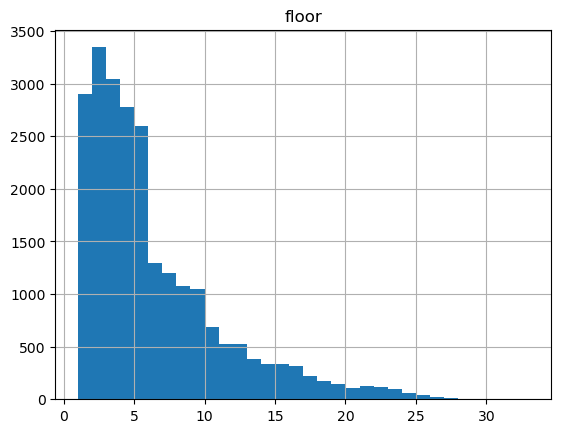

In [32]:
#этаж квартиры
data.hist('floor',bins=32)
plt.show()

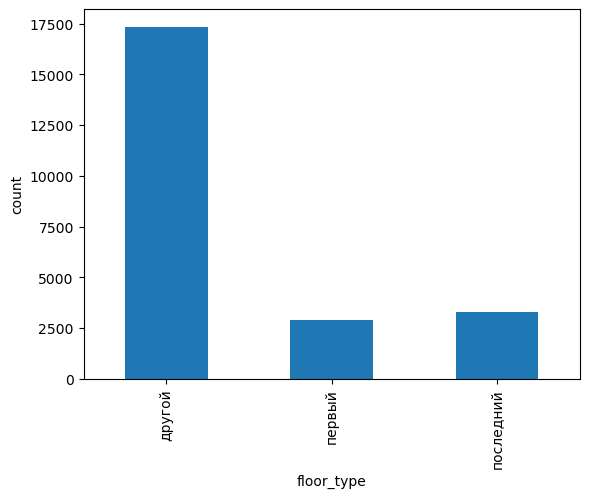

In [33]:
#тип этажа квартиры
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count');

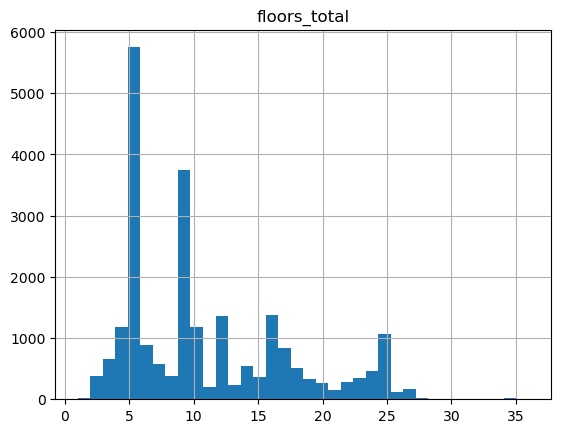

In [34]:
#общее количество этажей в доме
data.hist('floors_total', bins=36)
plt.show()

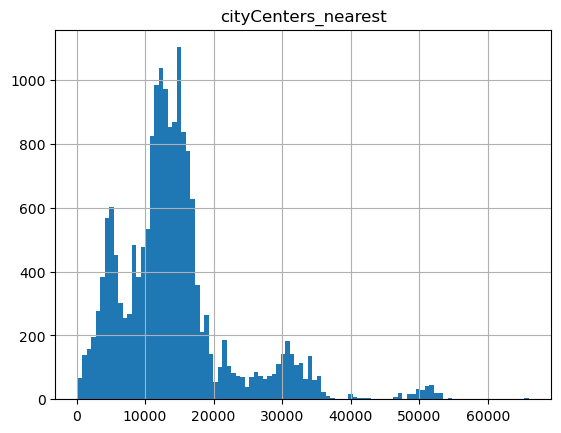

In [35]:
#расстояние до центра города в метрах
data.hist('cityCenters_nearest', bins=100)
plt.show()

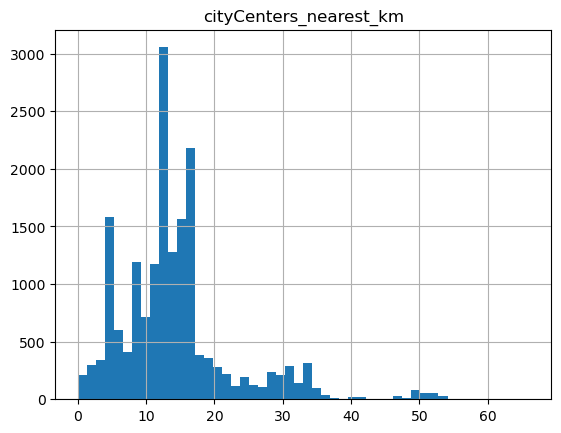

In [36]:
#расстояние до центра города в км
data.hist('cityCenters_nearest_km', bins=50)
plt.show()

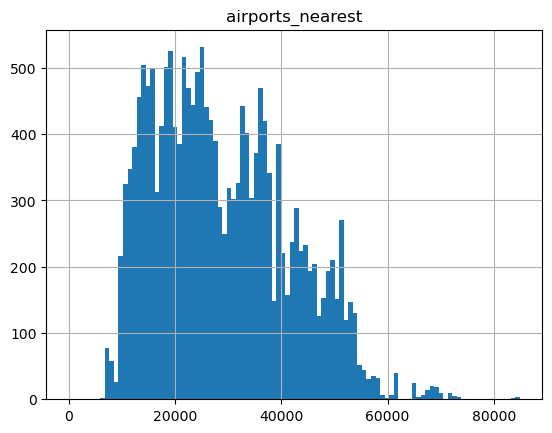

In [37]:
#расстояние до ближайшего аэропорта
data.hist('airports_nearest', bins=100)
plt.show()

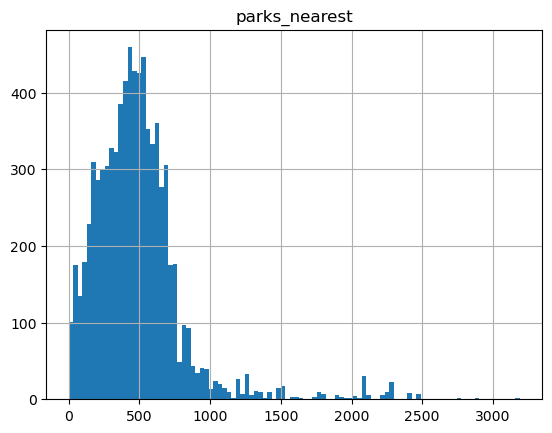

In [38]:
#расстояние до ближайшего парка
data.hist('parks_nearest', bins=100)
plt.show()

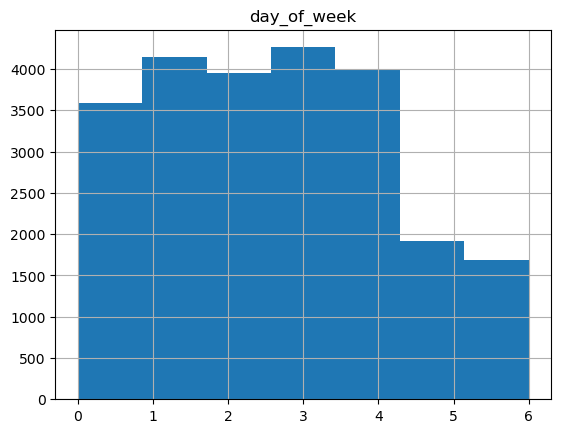

In [39]:
#день публикации объявления
data.hist('day_of_week', bins=7)
plt.show()

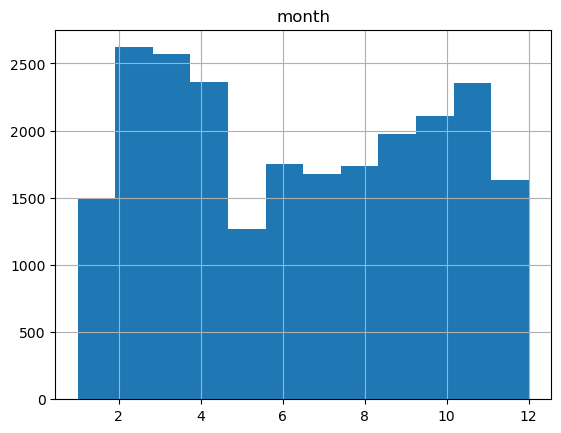

In [40]:
#месяц публикации объявления
data.hist('month' , bins=12)
plt.show()

Промежуточные выводы:<br>
-Больше сотни квадратных метров ощущается сильный спад объявлений<br>
-По жилой площади в районе 24 кв.м. большой провал<br>
-Площадь кухонь выглядит нормально<br>
-Цена объекта тоже выглядит хорошо, большой хвост объясняется наличием элитной недвижимости<br>
-Больше всего 1-2-3 комнатных квартир, что вполне логично<br>
-Пик по высоте квартир приходится на 2.6м, что также логично<br>
-Преобладают кол-вом 5 и 9 этажки, вполне уместно.<br>
-Два пика по расстоянию до центра города. Около 5км и от 10 до 15км<br>
-По расстоянию до ближайшего аэропорта ничего примечательного<br>
-По расстоянию до ближайшего парка - самый пик до 750м<br>
-По созданию объявления: в субботу и воскресение спад кол-ва, а по месяцам - с февраля по апрель ажиотаж по кол-ву объявлений, и рост летом до ноября.


Среднее время продажи квартиры в днях: 180
Медианное время продажи квартиры в днях: 95


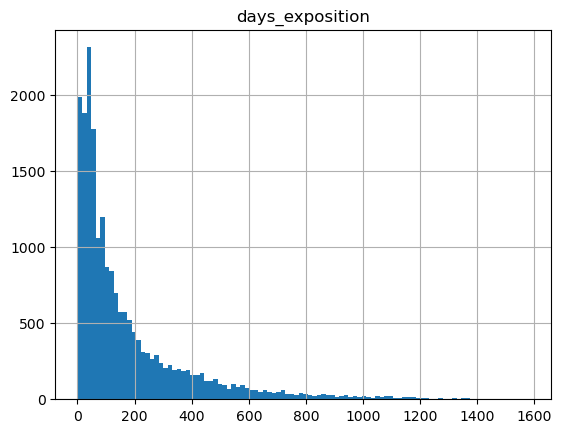

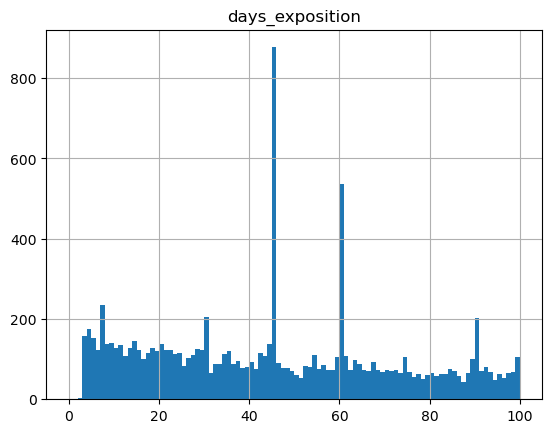

In [41]:
#Весь пик продаж квартир приходится на первые полгода.
#Найдя медианное время продажи квартиры сосредоточимся на первых 100 днях
#Большое кол-во продаж на 45,60,90 днях. Вероятнее всего, из-за настроек сервиса продажи квартир
data.hist('days_exposition', bins=100)
print('Среднее время продажи квартиры в днях:', int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:', int(data['days_exposition'].median()))
data.hist('days_exposition', bins=100,range=(0,100))
plt.show()

Обычно продажа квартиры занимает по времени полгода (учитываем среднее значение).<br>
Но медиана - 101 день.<br>
Следовательно, продажи квартиры менее чем за 100 дней - быстрые.<br>
А продажи квартир более, чем за 180 дней -  необычно долгие.<br>
Большое кол-во продаж на 45,60,90 днях. Вероятнее всего, из-за настроек сервиса продажи квартир


In [42]:
list_for_plot = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type_int']
for value in list_for_plot:
    corr = data['last_price'].corr(data[value])
    print(f'Корреляция между ценой и {value} : {corr:0.2%}')

Корреляция между ценой и total_area : 75.66%
Корреляция между ценой и living_area : 66.14%
Корреляция между ценой и kitchen_area : 48.11%
Корреляция между ценой и rooms : 45.86%
Корреляция между ценой и floor_type_int : 4.18%


На первый взгляд на полную стоимость влияет очень: общая площадь, жилая площадь, площадь кухни и кол-во комнат.<br>
И меньше всего влияют: этаж квартиры, день недели подачи объявления, месяц подачи, и год подачи.

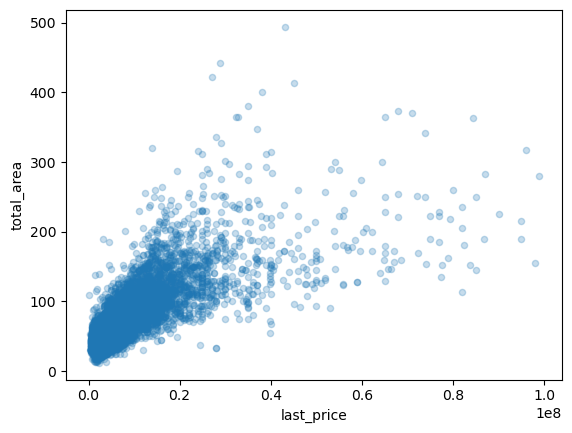

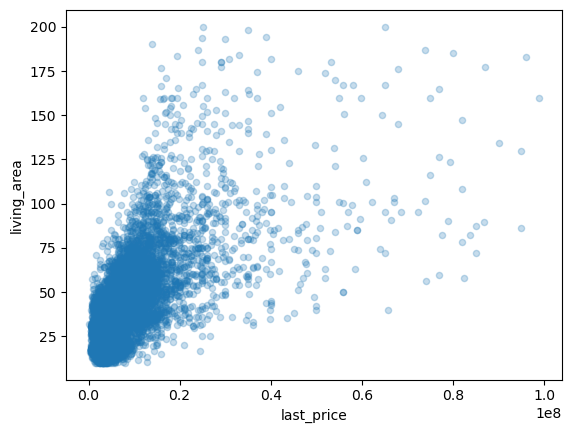

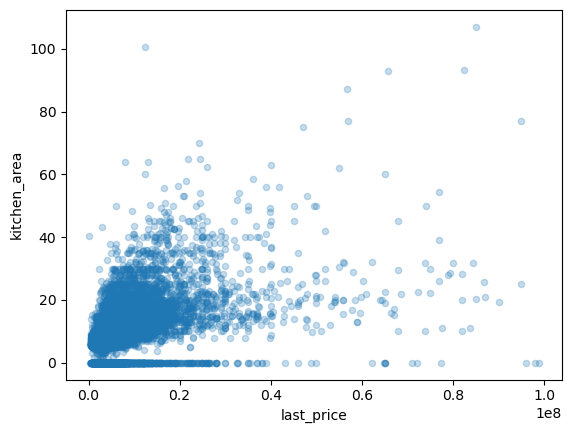

In [43]:
#На графиках изображены отношения цены к метражу. Общая площадь, жилая площадь и площадь кухни соответственно.
data.plot(x='last_price', y='total_area', kind= 'scatter', alpha=0.25)
data.plot(x='last_price', y='living_area', kind= 'scatter', alpha=0.25)
data.plot(x='last_price', y='kitchen_area', kind= 'scatter', alpha=0.25)
plt.show()

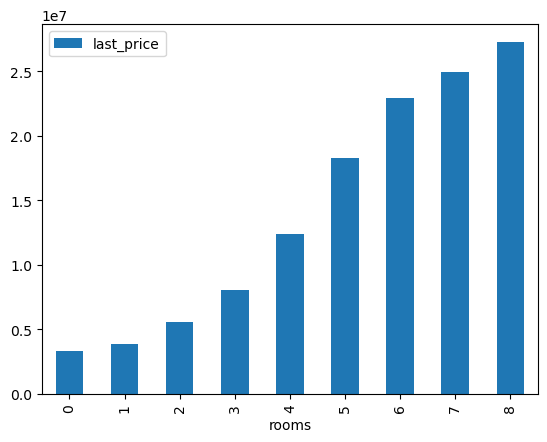

In [44]:
#Кол-во комнат в квартире, логично, влияет на итоговую стоимость недвижимости
data.pivot_table(index='rooms', values='last_price').plot(y='last_price', kind='bar')
plt.show()

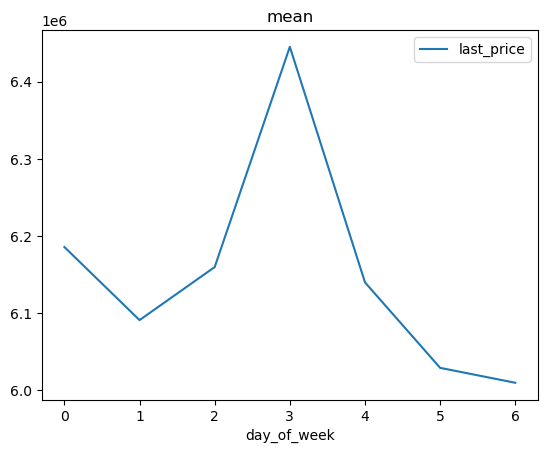

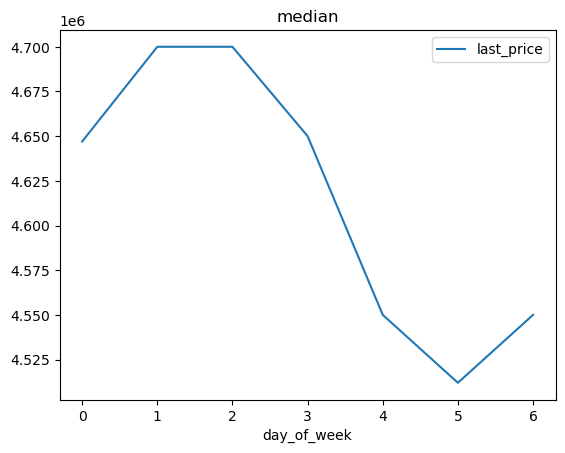

In [45]:
data.pivot_table(index='day_of_week', values='last_price', aggfunc='mean').plot(y='last_price',kind='line',title='mean')
data.pivot_table(index='day_of_week', values='last_price', aggfunc='median').plot(y='last_price',kind='line',title='median')
plt.show()

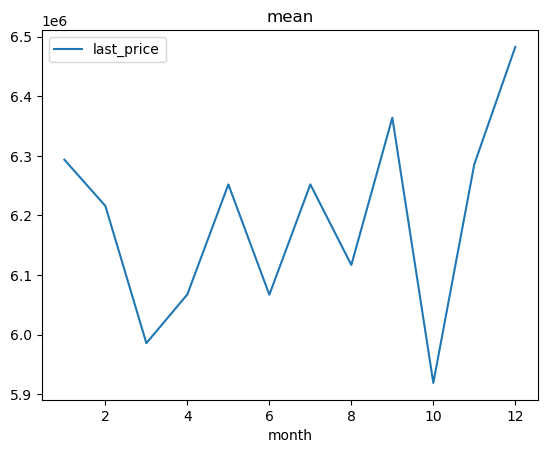

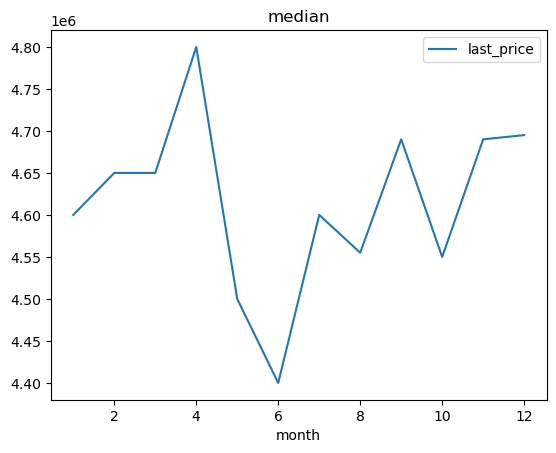

In [46]:
data.pivot_table(index='month', values='last_price', aggfunc='mean').plot(y='last_price',kind='line',title='mean')
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(y='last_price',kind='line',title='median')
plt.show()

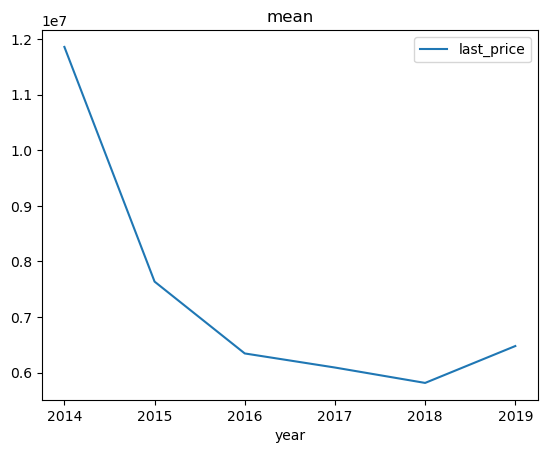

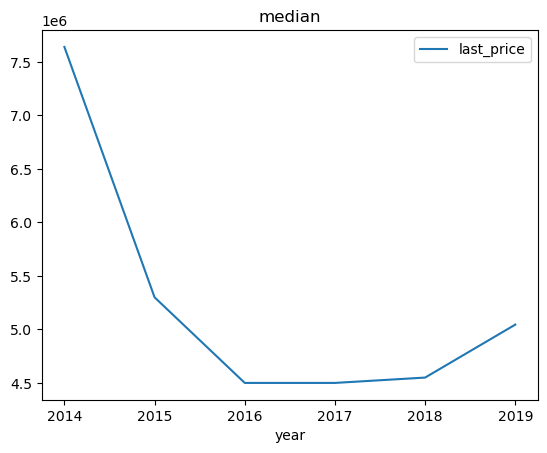

In [47]:
data.pivot_table(index='year', values='last_price', aggfunc='mean').plot(y='last_price',kind='line',title='mean')
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(y='last_price',kind='line',title='median')
plt.show()

Цена слабо зависит от дня недели и месяца, но есть общий спад до 2016 года, далее стагнация на 2 года и легкий рост к 2019 году

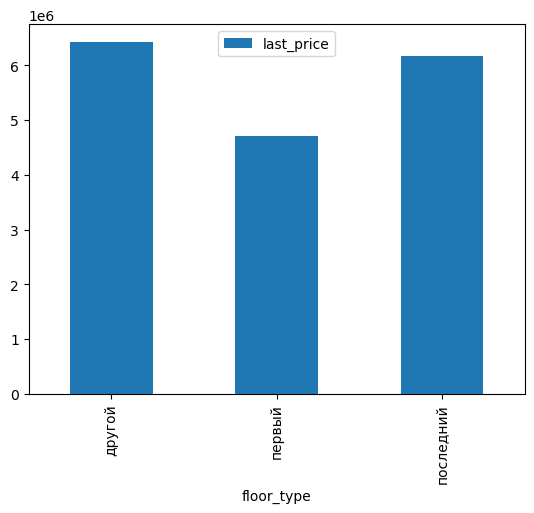

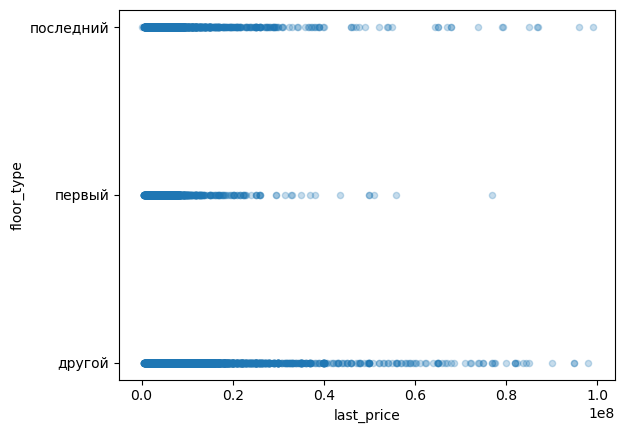

In [48]:
#Цена слабо зависит от этажа, на котором расположена квартира.
data.pivot_table(index="floor_type", values='last_price').plot(y='last_price', kind='bar')
data.plot(x='last_price', y="floor_type", kind='scatter', alpha=0.25 )
plt.show()

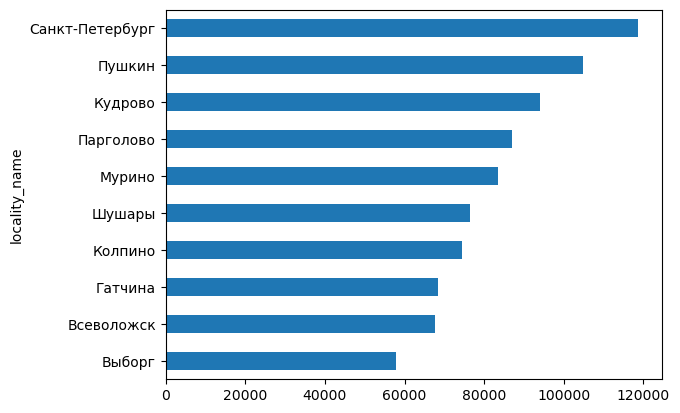

In [49]:
#Вычислили топ10 по объявлениям, далее рассчитали для него цену квадратного метра.
top = data.pivot_table(index='locality_name', values=['last_price','total_area'],aggfunc=['sum', 'count'])
top.columns=['last_price_sum','total_area_sum', 'last_price_count', 'total_area_count']
top.pop('total_area_count')
top.sort_values('last_price_count',ascending=False,inplace=True)
top = top.iloc[:10]
top['price_per_sqm'] = top['last_price_sum']/top['total_area_sum']
top.sort_values(by='price_per_sqm', ascending=True,inplace=True)
top['price_per_sqm'].plot(kind="barh")
plt.show()

Самым дорогим квадратным метром оказался в городе Санкт-Петерсбург, а дешевым - Выборг.

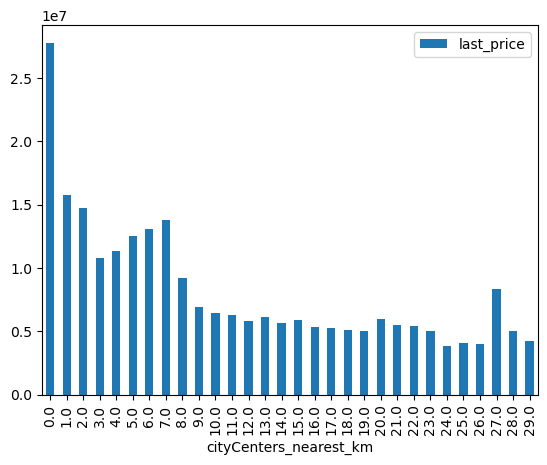

In [50]:
#Строим график ценообразования квартир по удалению от центра Петербурга.
data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(
        index='cityCenters_nearest_km',
        values='last_price',
        aggfunc='mean').plot(kind='bar')
plt.show()

Самыми дорогими квартирами вышли в центре Петербурга, далее спад.<br>
На 27 км какой-то странный пик, но вероятнее всего, это какой элитный коттеджный комплекс.<br>
Зона центра заканчивается дальше 2км. Или же в пределах одного км. В целом, можно разделять и понимать за центр любое расстояние, в зависимости от того, с чем сравнивать. 


### Общий вывод

<p>Была сделана <b><i> предообработка данных </b></i>, а именно:</p>
<ul><li>Заполнили пропуски
    <li>Изменили типы данных на корректные и удобные для анализа
    <li>Устранили дубликаты явные и неявные
    <li>Нашли и исправили ошибки форматирования данных при заполнении (увеличенные в 10 раз показатели высоты потолка)</ul>
</p>
<p>По итогу <b><i>анализа</b></i>, обнаружили, что сильно зависит цена от метража квартиры и кол-ва комнат.</p>
В топ10 вошли города расположенные рядом с Санкт-Перербургом, а именно:<br>
<li>Санкт-Петербург</li>
<li>Пушкин</li>  
<li>Кудрово</li>
<li>Паргалово</li> 
<li>Мурино</li>
<li>Шушары</li>
<li>Колпино</li>
<li>Гатчина</li>
<li>Всеволжск</li>
<li>Выборг</li>    
<b><i>ТОП1</b></i>, логично, что сам Петербург.<br>
Самые дорогие квартиры оказались расположенностью до 8км от центра Санкт-Петербурга.<br>
Далее идёт спад и не слишком явные дорогие квартиры на расстоянии 27км от центра столицы.<br>
Скорее всего это коттеджный элитный поселок.<br>
Быстрые продажи квартир происходили до 100 дней, необычно долгие были - свыше полугода.<br>
Также были зафиксированы снятия объявлений через 45,60,90 дней. Это связано с настройками сервиса продажи квартир(как я думаю)<br>
Слабо зависит ценообразование от месяца и дня недели, но судя по исследованию, то год все же зависит и если до до 2016 был спад продаж, то после активизировался вновь и цена начали расти.
